In [1]:
import pandas as pd
import os
import streamlit as st
import numpy as np
import datetime as dt
from twelvedata import TDClient
from opensea import OpenseaAPI
from opensea import utils
import CustomModule as cm
from MCForecastTools import MCSimulation

In [2]:
# Streamlit UI
st.sidebar.header("Sort and Filter")
asset_categories = st.sidebar.selectbox("Assets", ['NFT', 'Cryptocurrencies'])
st.header(f"Crypto API Tracker - {asset_categories}")




# Opensea API Key
opensea_api = OpenseaAPI(apikey="7913a9c0377249d2998900d7ce6d38b3")


# Twelve Data API Key
td = TDClient(apikey="d1d0c43b0fb445518d1435c2b90c9cdc") 



# NFT Assets

# Main NFT Code
if asset_categories == 'NFT':
    
    filters = st.sidebar.selectbox("Filters", ['Statistics', 'Compare'])
    
    # Filter Selection
    # Statistics Filter
    if filters == 'Statistics':
        #User input Code
        st.subheader('Collection Contract Address')
        user_input_stats = str(st.text_input('What NFT Contract Address would you like to explore? ')) 
        
        # Check for user input
        if len(user_input_stats) > 1:
            
             # Contract Data
        
            contract_data = opensea_api.contract(asset_contract_address = user_input_stats)
            description = contract_data['collection']['description']
            date_of_creation = contract_data['collection']['created_date']
            discord = contract_data['collection']['discord_url']
            website = contract_data['collection']['external_url']
            name = (contract_data['collection']['name']).title()
            telegram = contract_data['collection']['telegram_url']
            twitter = contract_data['collection']['twitter_username']
            instagram = contract_data['collection']['instagram_username']
            address = contract_data['address']
            # Project Description
            st.subheader(f"{name}")
            st.subheader('Project Summary:')
            st.write(f'{description}')
            
            # Collection statistics
            st.subheader('Collection Statistics')
            user_input = user_input_stats
            st.write(cm.pull_nft_stats(user_input, opensea_api))
            
            # Project Socials
            st.write(cm.get_socials(name, telegram, twitter, instagram, discord, website))

        # Compare Filter
    elif filters == 'Compare':
        st.subheader("Comparing NFT Collections")
        user_input_compare_first = str(st.text_input("What is the first NFT collection you would like to compare?"))
        response_2 = ''
        user_input_compare_second = str(st.text_input("What is the second NFT collection you would like to compare?", key = response_2))
        
        # Checking for user input
        if len(user_input_compare_first) > 1:
            if len(user_input_compare_second) > 1:

                # Contract Data
                # First set of contract data
                contract_data_first = opensea_api.contract(asset_contract_address = user_input_compare_first)
                description1 = contract_data_first['collection']['description']
                date_of_creation1 = contract_data_first['collection']['created_date']
                discord1 = contract_data_first['collection']['discord_url']
                website1 = contract_data_first['collection']['external_url']
                name1 = (contract_data_first['collection']['name']).title()
                telegram1 = contract_data_first['collection']['telegram_url']
                twitter1 = contract_data_first['collection']['twitter_username']
                instagram1 = contract_data_first['collection']['instagram_username']
                address1 = contract_data_first['address']

                # Second set of Contract Data
                contract_data_second = opensea_api.contract(asset_contract_address = user_input_compare_second)
                description2 = contract_data_second['collection']['description']
                date_of_creation2 = contract_data_second['collection']['created_date']
                discord2 = contract_data_second['collection']['discord_url']
                website2 = contract_data_second['collection']['external_url']
                name2 = (contract_data_second['collection']['name']).title()
                telegram2 = contract_data_second['collection']['telegram_url']
                twitter2 = contract_data_second['collection']['twitter_username']
                instagram2 = contract_data_second['collection']['instagram_username']
                address2 = contract_data_second['address']

                # Creating two Columns for comparison
                col1, col2 = st.columns(2)

                # Defining the two columns
                with col1:
                    # Project Desciption
                    st.subheader(f'{name1}')
                    st.subheader('Project Summary')
                    st.write(f'{description1}')

                    # Collection 1 Statistics
                    st.subheader(f'{name1} Statistics')
                    user_input = user_input_compare_first
                    st.write(cm.pull_nft_stats(user_input, opensea_api ))
                
                with col2:
                    # Project Desciption
                    st.subheader(f'{name2}')
                    st.subheader('Project Summary')
                    st.write(f'{description2}')

                    # Collection 1 Statistics
                    st.subheader(f'{name2} Statistics')
                    user_input = user_input_compare_second
                    st.write(cm.pull_nft_stats(user_input, opensea_api))


# Cryptocurrency assets

# Code for Crypto DataFrame
# Defined Crypto Functions




# Cryptocurrency asset code
if asset_categories == "Cryptocurrencies":
    
    # User imput code
    st.subheader('CryptoCurrency Ticker')
    user_inputc = st.text_input("What Crypto Currency Trading Pair are you looking for?")
    st.write("Ex: BTC/USD, ETH/USD, LUNAt/USD")

    if len(user_inputc) > 1:
        
        
        # Executing the Crypto DataFrame
        
        st.write(cm.create_ts(user_inputc, td))


        # Percentage return global code  
        st.subheader('Percentage Change')

        # Define Data Frame
        crypto_df_new = cm.create_ts(user_inputc, td)
        crypto_df_close = crypto_df_new.drop(columns= ['open','high','low'])
        pct_change_raw = crypto_df_close.pct_change()
        
        
        # Rename percentage change columns 
        pct_change= pct_change_raw.rename(columns= {'close':'daily_return'}).dropna().copy()
        st.write(pct_change)  

        # Create sharpe ratio subheader
        st.subheader ('Sharpe Ratio') 
        
        # Calculate annualized Standard Deviation
        std_annual = (pct_change.std()*np.sqrt(252))
        
        # Calculate annualized Mean Return
        mean_returns_annual = (pct_change.mean()*252)
        
        # Calculate annualized Sharpe Ratio
        sharpe_ratio = (mean_returns_annual/std_annual)
        st.write(sharpe_ratio)

        # Create cumulative returns subheader 
        st.subheader ('Cumulative Returns')

        # Calculate cumulative returns subheader 
        cumulative_returns = (1+pct_change).cumprod()
        st.write(cumulative_returns )



2022-04-16 21:25:39.817 
  command:

    streamlit run C:\Users\Owner\anaconda3\envs\openseaenv\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [3]:
# Monte Carlo Simulation
# Set the tickers
tickers =['BTC/USD', 'ETH/USD'] 

# Create BTC and ETH subheader 
st.subheader('Sample Cryptocurrency Prices')
# BTC and ETH DataFrame
btc_df = (cm.btc_df)
eth_df = (cm.eth_df)

# Display BTC and ETH DataFrame
BTC =btc_df.drop(columns=['open', 'high', 'low'], axis=1)
ETH= eth_df.drop(columns=['open', 'high', 'low'], axis=1)

In [4]:
# Concatenate DFs 
portfolio_df= pd.concat([BTC,ETH],axis=1, keys=['BTC/USD', 'ETH/USD'])
portfolio_df.dtypes

BTC/USD  close    float64
ETH/USD  close    float64
dtype: object

In [5]:
portfolio_df

,BTC/USD,ETH/USD
,close,close
datetime,,
2017-12-31,13387.00,754.99
2018-01-01,14678.72,855.28
2018-01-02,14919.51,934.03
2018-01-03,15099.99,940.00
2018-01-04,16998.99,959.30
...,...,...
2022-03-26,46834.96,3295.65
2022-03-27,47115.61,3329.20


In [6]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = portfolio_df,
    weights = [.70,.30],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [7]:
# Printing the simulation input data
MC_fiveyear.portfolio_data

BTC/USD               ETH/USD             
               close daily_return    close daily_return
datetime                                               
2017-12-31  13387.00          NaN   754.99          NaN
2018-01-01  14678.72     0.096491   855.28     0.132836
2018-01-02  14919.51     0.016404   934.03     0.092075
2018-01-03  15099.99     0.012097   940.00     0.006392
2018-01-04  16998.99     0.125762   959.30     0.020532
...              ...          ...      ...          ...
2022-03-26  46834.96     0.052046  3295.65     0.047542
2022-03-27  47115.61     0.005992  3329.20     0.010180
2022-03-28  47442.20     0.006932  3402.07     0.021888
2022-03-29  47063.55    -0.007981  3385.69    -0.004815
2022-03-30  45514.96    -0.032904  3282.39    -0.030511

[1551 rows x 4 columns]

In [8]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Owner\Class_Notes\Projects\Project_1\MCForecastTools.py:121: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002761,1.060994,0.988544,0.961636,0.985621,0.985903,1.025291,1.001362,0.981604,0.988305,...,0.994967,1.004009,0.998003,1.005333,0.997426,0.972085,1.039007,1.034387,1.002441,0.952912
2,1.034316,1.102668,1.042044,0.992071,1.010318,0.965457,1.023474,0.991236,0.968272,0.905554,...,0.966740,1.013085,1.033860,1.037636,0.964890,0.965439,1.095512,1.060469,0.980401,0.973837
3,1.011340,1.083033,1.024179,0.967319,0.964926,0.910249,1.037064,0.993884,0.951847,0.917897,...,0.967640,1.006227,1.029781,0.956289,0.984196,0.982270,1.139103,1.064758,1.019359,0.964862
4,1.021260,1.062061,1.020633,0.916064,0.932963,0.946993,1.113953,0.986379,0.962725,0.945468,...,0.957860,0.985767,0.999868,0.970421,0.963149,0.998593,1.165228,1.001304,1.014534,0.934243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,7.709360,4.769965,11.054179,2.932732,13.491746,3.806852,2.303770,6.632516,2.895960,10.099587,...,26.772262,5.831695,2.673544,12.713186,10.934828,7.372931,7.672726,8.541026,4.427053,9.944787
1257,7.719519,4.729400,11.374223,2.906097,12.870425,3.865206,2.394444,6.222213,2.965762,10.222017,...,28.231485,5.815166,2.744478,13.060246,10.668117,7.670697,7.674323,9.033327,4.264188,9.918957
1258,7.402198,4.552635,11.097377,3.085194,13.302271,3.726172,2.359393,6.345520,2.875474,10.087934,...,29.552772,5.981109,2.857607,12.432675,11.275128,7.013053,7.787836,8.869239,4.320025,10.101581
1259,7.692673,4.564739,11.581038,3.004241,13.309393,3.874246,2.283704,6.326848,2.954355,10.222380,...,29.228250,5.975804,2.893384,11.950248,11.196459,6.586310,7.277342,8.609706,4.382023,10.102306


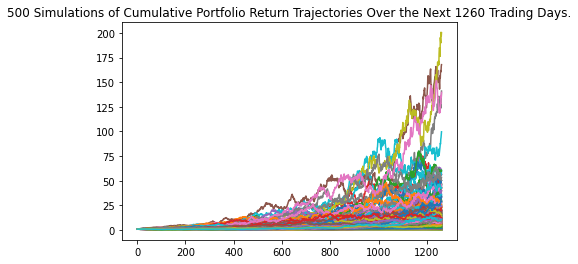

In [9]:
line_plot = MC_fiveyear.plot_simulation()

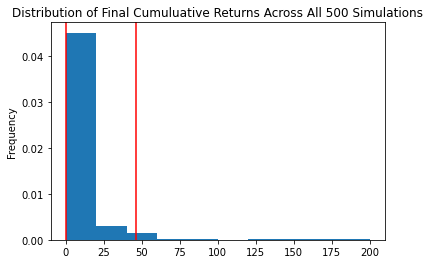

In [10]:
dist_plot_five = MC_fiveyear.plot_distribution()

In [11]:
 # Fetch summary statistics from the 5yr Monte Carlo simulation results
summary_statistics_five = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics_five)

count           500.000000
mean             10.095821
std              17.622185
min               0.184619
25%               2.303272
50%               5.624133
75%              10.819807
max             200.201223
95% CI Lower      0.603962
95% CI Upper     46.600227
Name: 1260, dtype: float64


In [12]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_statistics_five[8]*initial_investment,2)
ci_upper = round(summary_statistics_five[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $12079.25 and $932004.54


In [13]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = portfolio_df,
    weights = [.70,.30],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [14]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Owner\Class_Notes\Projects\Project_1\MCForecastTools.py:121: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.976513,0.990653,1.016759,1.016009,1.032313,1.015104,1.046233,1.030617,1.002398,1.047284,...,1.023349,0.967561,0.963712,1.025163,0.961116,0.949702,0.978894,1.052756,1.006256,0.984963
2,1.001131,0.952267,1.014241,1.044070,1.060807,0.987243,1.010543,1.004179,0.968892,1.063656,...,1.089332,0.981796,0.955532,0.986722,0.921329,0.937279,0.984911,1.051730,0.986221,0.999511
3,1.053299,0.941680,1.023054,1.051978,1.090560,0.994295,0.999407,1.008375,1.014821,0.995088,...,1.070025,0.969228,0.871680,0.997519,0.921712,0.896962,0.996181,1.063662,1.020660,1.028698
4,1.079817,0.944520,0.999445,1.038713,1.096242,1.027151,0.962389,0.994381,1.014667,1.027921,...,1.056743,0.941747,0.898369,0.988987,0.923637,0.894549,0.991820,1.049338,1.010742,1.017004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,45.691515,1.005400,59.686215,195.416842,155.326656,350.258413,1.743883,56.070378,34.969874,929.991619,...,3.495872,378.568319,4.553115,402.555657,15.585441,1041.984471,401.186144,2.969589,40.234543,51.096955
2517,44.733341,0.975644,58.188046,198.101633,156.058024,350.124065,1.750263,55.319930,36.188015,949.079973,...,3.445279,392.694274,4.693851,400.462597,15.799666,1029.181149,397.762720,3.256052,39.121591,47.795306
2518,42.925393,1.005898,56.710480,199.274559,158.168774,345.333234,1.748709,53.708016,37.764541,990.781932,...,3.498271,407.637358,4.634757,404.399047,15.922138,973.557315,417.628853,3.268460,38.829485,46.242936
2519,46.404594,1.059190,56.611637,195.743314,162.701646,358.346205,1.746527,54.205810,36.073166,989.816132,...,3.581032,407.354363,4.559068,418.156523,15.607147,967.058578,400.939395,3.208426,39.628840,45.295203


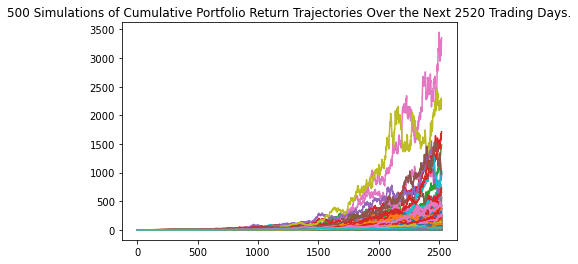

In [15]:
line_plot = MC_tenyear.plot_simulation()

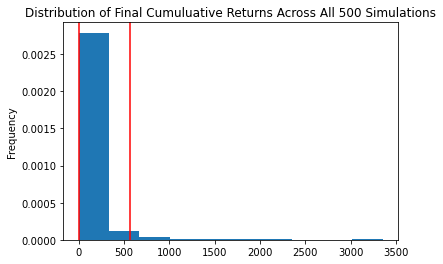

In [16]:
dist_plot_ten = MC_tenyear.plot_distribution()

In [17]:
# Fetch summary statistics from the 10yr Monte Carlo simulation results
summary_statistics_ten = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics_ten)

count            500.000000
mean              96.804746
std              245.351048
min                0.148036
25%                9.851014
50%               27.283942
75%               83.419175
max             3354.994642
95% CI Lower       1.168127
95% CI Upper     565.601648
Name: 2520, dtype: float64


In [18]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_statistics_ten[8]*initial_investment,2)
ci_upper = round(summary_statistics_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $23362.55 and $11312032.96


In [19]:
# Configuring a Monte Carlo simulation to forecast 20 years cumulative returns
MC_twentyyear = MCSimulation(
    portfolio_data = portfolio_df,
    weights = [.70,.30],
    num_simulation = 500,
    num_trading_days = 252*20
)

In [20]:
# Running a Monte Carlo simulation to forecast 20 years cumulative returns
MC_twentyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Owner\Class_Notes\Projects\Project_1\MCForecastTools.py:121: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.951881,1.066201,1.005994,1.016729,0.993335,0.987796,1.025062,0.991836,1.046816,1.057084,...,1.012402,0.927793,0.991713,1.045847,0.997028,0.992973,1.001046,1.032176,1.010343,1.035080
2,0.959009,1.047698,1.064444,1.013619,0.949164,1.010000,1.057226,1.013979,1.048851,1.018618,...,1.021525,0.902386,0.998559,1.092405,0.976317,1.010729,0.968150,1.036666,1.007239,1.016579
3,0.976266,1.083445,1.060769,0.982625,0.962877,1.004627,1.070020,1.031950,1.062344,1.010365,...,0.983659,0.937107,0.975045,1.057331,1.008995,1.054126,0.981197,1.056049,1.102482,1.014190
4,0.951239,1.085677,1.055596,0.987287,0.934370,0.940202,1.076788,0.985537,1.068195,1.037638,...,0.967271,0.956476,1.068110,0.986054,0.960818,1.067482,1.026197,1.059082,1.071816,1.043902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,9174.719537,4.961021,907.557671,41.871175,1878.759168,1620.953465,447.541788,103.480988,108.263733,581.427317,...,1451.596533,39.428790,91.486712,6414.522946,34.078082,90.855720,362.856522,5635.695922,5217.245274,1060.880349
5037,9129.106050,5.012859,932.529414,43.583198,1908.019589,1491.068047,408.450709,99.061511,108.718735,571.436066,...,1527.504831,36.504378,90.977980,6406.360106,35.128808,90.511673,359.118858,5756.745178,5278.278655,1109.492084
5038,8895.152618,4.905689,966.032101,43.592918,1946.966994,1450.381231,402.004207,96.422011,109.874838,608.533559,...,1526.625795,38.790438,93.186566,6287.847406,34.474334,85.974362,375.885111,5730.785871,5390.032593,1141.382105
5039,8262.275975,4.916425,923.157941,42.357489,1863.688715,1379.206315,402.629106,101.010736,111.507926,627.541424,...,1557.637199,40.068905,93.967799,5834.385204,32.713081,86.750899,403.549049,5699.861240,5285.406119,1151.468746


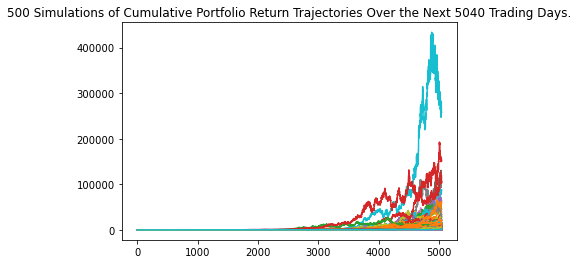

In [21]:
line_plot = MC_twentyyear.plot_simulation()

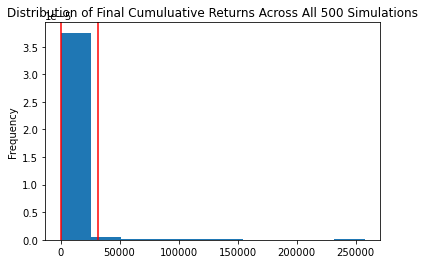

In [22]:
dist_plot_twenty = MC_twentyyear.plot_distribution()

In [23]:
# Fetch summary statistics from the 20yr Monte Carlo simulation results
summary_statistics_twenty = MC_twentyyear.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics_twenty)

count              500.000000
mean              4516.455528
std              17634.286154
min                  1.004284
25%                120.067055
50%                591.187858
75%               2402.875278
max             257863.327678
95% CI Lower         5.709999
95% CI Upper     31378.341065
Name: 5040, dtype: float64


In [25]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_statistics_twenty[8]*initial_investment,2)
ci_upper = round(summary_statistics_twenty[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 20 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 20 years will end within in the range of $114199.98 and $627566821.29
